In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
# set_dir = 'set1_short'
# set_dir = 'set1_full'

# set_dir = 'set2_short'
# set_dir = 'set2_full'

set_dir = 'set3_short'
# set_dir = 'set3_full'

data = pd.read_csv(set_dir + '/infection_risk.txt')
data

,day,cycle,prevalence,name,smell_and_taste_loss,cough,fatigue,skipped_meals,status,risk
0,2,10,0.001086,Individual1516,0.0,0.0,0.0,1.0,L,0.957379
1,3,12,0.001195,Individual6576,0.0,0.0,0.0,0.0,S,0.771716
2,3,13,0.001521,Individual4653,0.0,1.0,0.0,0.0,L,0.827140
3,3,13,0.001521,Individual1458,1.0,0.0,0.0,0.0,L,1.000000
4,3,13,0.001521,Individual9195,0.0,1.0,0.0,1.0,L,1.000000
...,...,...,...,...,...,...,...,...,...,...
7355,24,99,0.716663,Individual5914,0.0,0.0,0.0,1.0,L,0.301082
7356,24,99,0.716663,Individual8358,0.0,1.0,0.0,0.0,L,0.310633
7357,24,99,0.716663,Individual1019,0.0,0.0,0.0,0.0,L,0.260757
7358,24,99,0.716663,Individual2695,0.0,1.0,0.0,0.0,L,0.374928


In [121]:
susceptibles = data[data['status'] == 'S']
print(np.mean(susceptibles['risk']), np.std(susceptibles['risk']))

latents = data[data['status'] == 'L']
print(np.mean(latents['risk']), np.std(latents['risk']))

0.5536427469763189 0.3100898402018436
0.6329796864617723 0.3083163882217683


In [54]:
cycle = list(data['cycle'])
name = list(data['name'])
status = list(data['status'])
risk = list(data['risk'])

all_cases = {}
for (n, c, s, r) in zip(name, cycle, status, risk):
    if n in all_cases:
        log = all_cases[n]
    else:
        log = []
        all_cases[n] = log
    log += [[c, s, min(1, r)]]   
        
noninf = []
infected = []
for n in all_cases:
    log = all_cases[n]
    if 4 < len(log):
        c = []
        r = []
        inf = False
        for v in log:
            c += [v[0]]
            r += [v[2]]
            if v[1] != 'S': inf = True
        if inf:
            infected += [[c, r]]
        else:
            noninf += [[c, r]]           

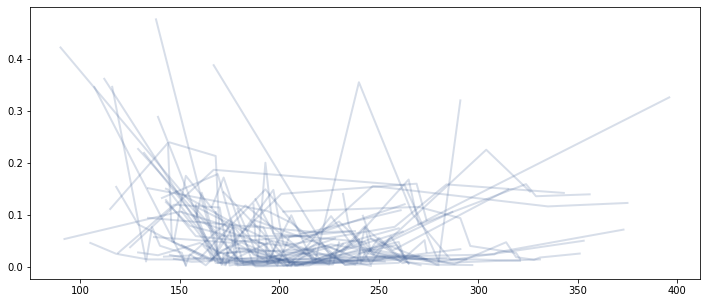

In [55]:
fig, _ = plt.subplots(figsize=(12,5))

ninfcolor = sns.xkcd_rgb["denim blue"]
infcolor = sns.xkcd_rgb["pale red"]

for hist in noninf:
    plt.plot(hist[0], hist[1], linewidth=2, color=ninfcolor, alpha=0.2)

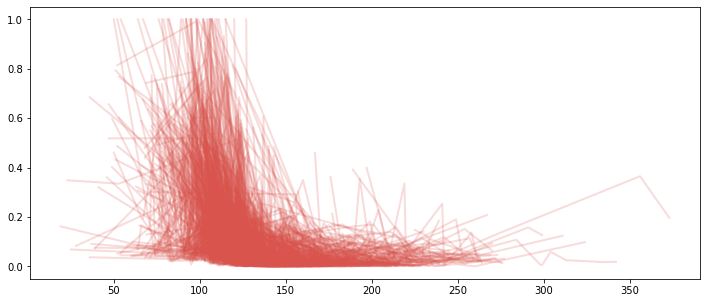

In [56]:
fig, _ = plt.subplots(figsize=(12,5))

for hist in infected:
    plt.plot(hist[0], hist[1], linewidth=2, color=infcolor, alpha=0.2)